<a href="https://colab.research.google.com/github/SKShorna/Machine-Learning/blob/master/Chest_X_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *
from fastai.widgets import *
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

data_root='/content/drive/My Drive/x_ray'

Mounted at /content/drive


In [ ]:

path = Path('/content/drive/My Drive/x_ray/train')
test_path = Path('/content/drive/My Drive/x_ray/test/')
classes = ['normal','pneumonia']

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
learn = load_learner(path)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set

In [ ]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/x_ray/train;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/x_ray/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2

In [ ]:
learn.data.classes

['normal', 'pneumonia']

In [ ]:
def get_labels():
  label_0, label_1 = learn.data.classes
  return  learn.data.classes[0], learn.data.classes[1]

In [ ]:
x,y = get_labels()
print(x)
print(y)

normal
pneumonia


In [ ]:
def xray_classifier(img_path, actual_class):
    img = open_image(img_path)
    pred_class,labels,probability = learn.predict(img)
  #  print(type(label))
    probs = probability.data.tolist()
    label = labels.item()
   # prob1 = probability.data[1]
    img.show(title=str(pred_class),figsize=(6, 4))
    print('random image: ',img_path)
    print('========================')
    print('labels: 0-' + learn.data.classes[0],' <=> ','1-' + learn.data.classes[1])
    print('label: ', label)
    print('Actual:     ',actual_class)
    print('Predicted:  ', str(pred_class))
    print('Probability - label 0: {0:.5f}'.format(round(probs[0],5)))
    print('Probability - label 1: {0:.5f}'.format(round(probs[1],5)))
    print('========================')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


random image:  /content/drive/My Drive/x_ray/test/pneumonia/person30_virus_69.jpeg
labels: 0-normal  <=>  1-pneumonia
label:  1
Actual:      pneumonia
Predicted:   pneumonia
Probability - label 0: 0.00000
Probability - label 1: 1.00000


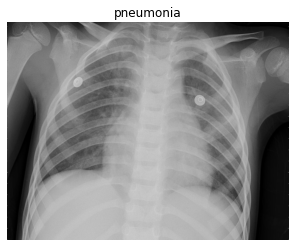

In [ ]:
rand_fol = random.choice([x for x in classes]) 
rand_folder = test_path/rand_fol  
rand_img = random.choice([x for x in os.listdir(rand_folder)])
rand_path = rand_folder/rand_img                        
actual_class = rand_fol
#Classify image
xray_classifier(rand_path, actual_class)
#